#Jonathan Halverson
#Friday, March 4, 2016
#Multiple Linear Regression

### Here we examine car data and arrive at a model for predicting sales prices of used cars based on eleven car properties:

In [31]:
import numpy as np
import pandas as pd
cars = pd.read_csv("kuiper.csv")
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [32]:
cars.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073875,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995020,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316635,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466720,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 16

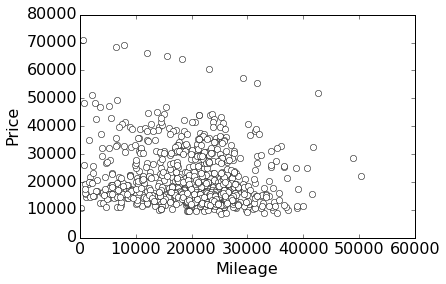

In [34]:
plt.plot(cars['Mileage'], cars['Price'], 'wo')
plt.xlabel('Mileage')
plt.ylabel('Price')

In [35]:
import statsmodels.api as sm
X = sm.add_constant(cars['Mileage'])
regmodel = sm.OLS(cars['Price'], X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.68e-05
Time:                        12:27:20   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.0

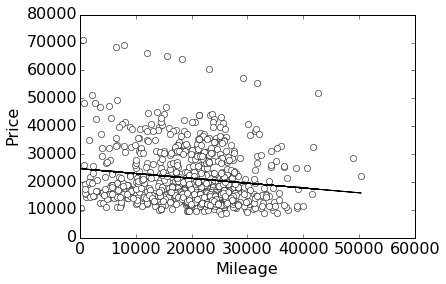

In [36]:
intercept = result.params[0]
slope = result.params[1]
lines = plt.plot(cars['Mileage'], cars['Price'], 'wo', cars['Mileage'], slope * cars['Mileage'] + intercept, 'k-')
plt.xlabel('Mileage')
plt.ylabel('Price')

### Let's examine the residuals which should be normally distributed and have approximately the same variance along the abscissa:

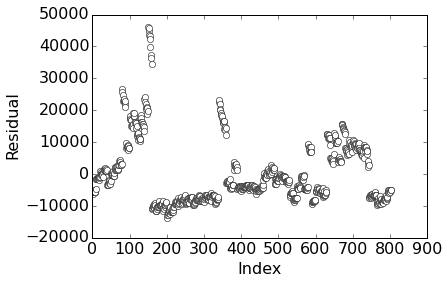

In [37]:
plt.plot(result.resid, 'wo')
plt.xlabel('Index')
plt.ylabel('Residual')

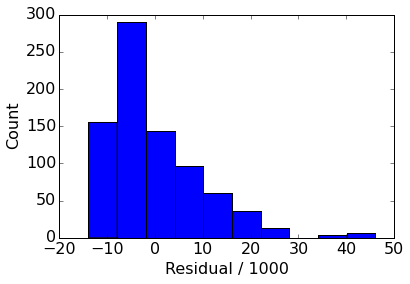

In [38]:
n, bins, patches = plt.hist(result.resid / 1000)
plt.xlabel('Residual / 1000')
plt.ylabel('Count')

### The residuals are unimodal and right skewed. Because there are 804 observations this should not be important.

### Split data based on cruise control (further below we will use R-style formulas):

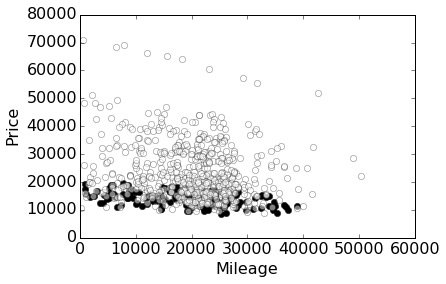

In [39]:
cars_wo_cruise = cars[cars['Cruise'] == 0]
cars_w_cruise = cars[cars['Cruise'] == 1]
plt.plot(cars_wo_cruise['Mileage'], cars_wo_cruise['Price'], 'ko')
plt.plot(cars_w_cruise['Mileage'], cars_w_cruise['Price'], 'wo', alpha=0.5)
plt.xlabel('Mileage')
plt.ylabel('Price')

In [40]:
X = sm.add_constant(cars_wo_cruise['Mileage'])
regmodel = sm.OLS(cars_wo_cruise['Price'], X, missing='none')
print regmodel.fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     44.76
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           2.25e-10
Time:                        12:27:21   Log-Likelihood:                -1809.3
No. Observations:                 199   AIC:                             3623.
Df Residuals:                     197   BIC:                             3629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.638e+04    398.065     41.149      0.0

###And now with cruise control: 

In [41]:
X = sm.add_constant(cars_w_cruise['Mileage'])
regmodel = sm.OLS(cars_w_cruise['Price'], X, missing='none')
print regmodel.fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     16.89
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.51e-05
Time:                        12:27:21   Log-Likelihood:                -6433.5
No. Observations:                 605   AIC:                         1.287e+04
Df Residuals:                     603   BIC:                         1.288e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.787e+04   1074.681     25.932      0.0

### Here we use Mileage and Cruise in the model using a Patsy formula:

In [42]:
import statsmodels.formula.api as smf
result = smf.ols(formula='Price ~ Mileage + Cruise', data=cars).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           1.41e-41
Time:                        12:27:21   Log-Likelihood:                -8441.7
No. Observations:                 804   AIC:                         1.689e+04
Df Residuals:                     801   BIC:                         1.690e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.754e+04    966.461     18.146      0.0

###Note that the slope is different in all models. Below we plot the model for the two cases:

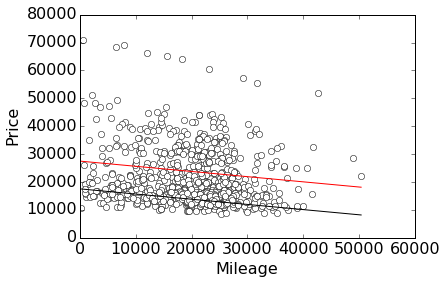

In [43]:
intercept, mileage, cruise = result.params
x = np.linspace(min(cars['Mileage']), max(cars['Mileage']))
plt.plot(cars['Mileage'], cars['Price'], 'wo', \
         x, mileage * x + cruise * 0 + intercept, 'k-', \
         x, mileage * x + cruise * 1 + intercept, 'r-')
plt.xlabel('Mileage')
plt.ylabel('Price')

### Let's try for an interaction term between Mileage and Cruise:

In [44]:
result = smf.ols(formula='Price ~ Mileage + Cruise + Mileage:Cruise', data=cars).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     70.93
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           1.12e-40
Time:                        12:27:21   Log-Likelihood:                -8441.3
No. Observations:                 804   AIC:                         1.689e+04
Df Residuals:                     800   BIC:                         1.691e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.638e+04   1622.098     10.

### Note that the p-value for the interaction term suggest that it's coefficient is probably zero. Notice that the R-squared values have been low (approx 0.2) for all models considered.

In [45]:
cars['Type'].describe()

count       804
unique        5
top       Sedan
freq        490
Name: Type, dtype: object

### Type is a categorical variable. Patsy can handle that by using indicator variables:

In [46]:
result = smf.ols(formula='Price ~ Mileage + Type', data=cars).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     79.82
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           6.17e-68
Time:                        12:27:21   Log-Likelihood:                -8373.1
No. Observations:                 804   AIC:                         1.676e+04
Df Residuals:                     798   BIC:                         1.679e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          4.489e+04   1353.79

###For fun, let's add a term that goes as the square of the Mileage: 

In [47]:
result = smf.ols(formula='Price ~ Mileage + I(Mileage**2)', data=cars).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.50e-05
Time:                        12:27:21   Log-Likelihood:                -8526.1
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     801   BIC:                         1.707e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.675e+04   1397.340     

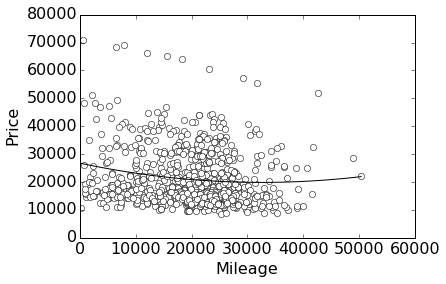

In [48]:
intercept, mileage, mileage2 = result.params
x = np.linspace(min(cars['Mileage']), max(cars['Mileage']))
plt.plot(cars['Mileage'], cars['Price'], 'wo', \
         x, mileage * x + mileage2 * x * x + intercept, 'k-')
plt.xlabel('Mileage')
plt.ylabel('Price')